In [1]:
# import required packages
import numpy as np
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit, ParameterSampler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, mean_squared_error, mean_absolute_error, precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay, DetCurveDisplay, r2_score
import matplotlib.pyplot as plt  # For creating plots

from ipynb.fs.defs.task3_1 import preprocessStarData, preprocessGWPData
from ipynb.fs.defs.task3_2 import SelectHoldoutSplits, AssessClassification, AssessRegression, findBestParams
from ipynb.fs.defs.task3_3 import findBestParamsPS

In [2]:
# Load pre processed data
star_data = preprocessStarData()
gwp_data = preprocessGWPData()

[array(['GALAXY', 'QSO', 'STAR'], dtype='<U6')]
[array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)]
[array(['finishing', 'sweing'], dtype=object)]
[array(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype=object)]


In [3]:
# Check data sets
print(star_data)
print(gwp_data)

[[0.45217391 0.09183086 0.45159189 0.64800655 0.        ]
 [0.83333333 0.11238889 0.8288413  0.89432004 0.        ]
 [0.35144928 0.09316979 0.35094862 0.54396505 0.        ]
 ...
 [0.20362319 0.02183899 0.20340363 0.399645   0.        ]
 [0.52898551 0.06622931 0.52805146 0.64991808 0.        ]
 [0.5826087  0.07874916 0.58171159 0.75040961 0.        ]]
[[1.         0.04763141 0.02722222 0.79733215]
 [0.93150685 0.03925589 0.         0.73618016]
 [1.         0.04157474 0.01388889 0.63927432]
 ...
 [0.79452055 0.03925589 0.         0.44198192]
 [0.93150685 0.02879515 0.         0.30695115]
 [0.8630137  0.04501839 0.         0.18158445]]


Test size: 0.2, Cross-validation score: 0.28950


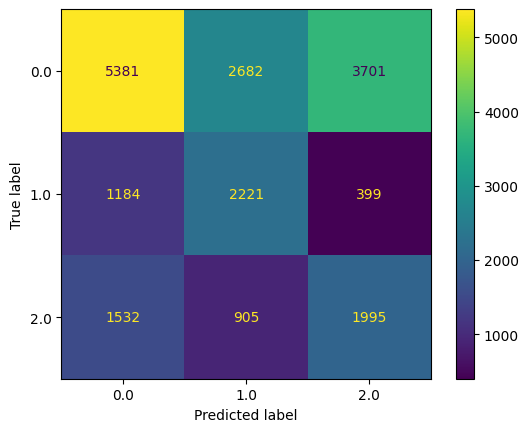

Test size: 0.25, Cross-validation score: 0.37328


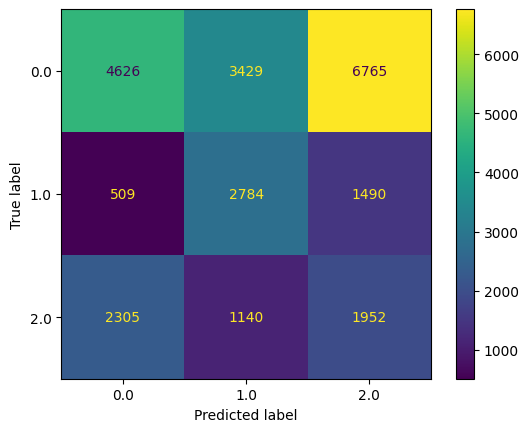

Test size: 0.3, Cross-validation score: 0.47210


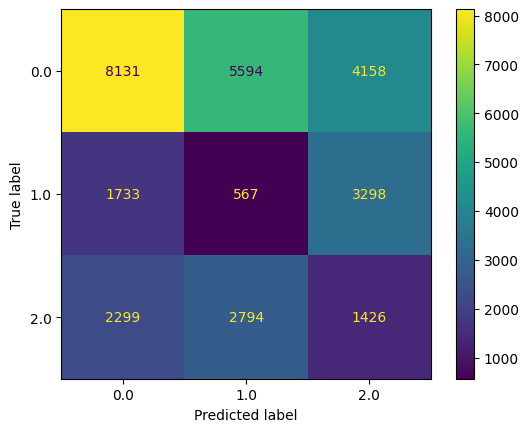

In [4]:
# Find best train, test split for this model
star_x_train, star_x_test, star_y_train, star_y_test = SelectHoldoutSplits(star_data, KMeans(n_clusters=3, n_init=1), 'classification', True)

# These confusion matrices display that the classifications are very varied, with an even amount of misclassifications and false positives across the classes.

In [5]:
# Loop through cluster sizes to find one with highest score
highest_score = 0
best_cluster_size = 0

for i in range(1,9):
    km = KMeans(n_clusters=i, n_init=1) 
    km.fit(star_x_train)
    
    score = np.sum(km.predict(star_x_test) == star_y_test) / star_y_test.size
    print(f"Cluster size: {i}, Score: {score}")
    
    # Check for highest score out of the cluster sizes and save to variable
    if score > highest_score:
        highest_score = score
        best_cluster_size = i

Cluster size: 1, Score: 0.5961
Cluster size: 2, Score: 0.4533
Cluster size: 3, Score: 0.349
Cluster size: 4, Score: 0.30716666666666664
Cluster size: 5, Score: 0.18536666666666668
Cluster size: 6, Score: 0.17633333333333334
Cluster size: 7, Score: 0.15906666666666666
Cluster size: 8, Score: 0.1327


In [6]:
# Using optimal cluster size make new km model for finding optimal parameters
params_km = {'n_clusters': [best_cluster_size],
          'n_init': [1, 10, 20],
          'tol': [0.001, 0.0001, 0.00001],
         'verbose': [False],
         'random_state': [1, 42, 84, 168],
         'copy_x': [True, False]}

km = KMeans(**findBestParamsPS(star_x_train, star_x_test, star_y_train, star_y_test, KMeans(), params_km, True))

Parameters: 0, Cross-validation score: 0.59610
Parameters: 1, Cross-validation score: 0.59610
Parameters: 2, Cross-validation score: 0.59610
Parameters: 3, Cross-validation score: 0.59610
Parameters: 4, Cross-validation score: 0.59610
Parameters: 5, Cross-validation score: 0.59610
Parameters: 6, Cross-validation score: 0.59610
Parameters: 7, Cross-validation score: 0.59610
Parameters: 8, Cross-validation score: 0.59610
Parameters: 9, Cross-validation score: 0.59610
Parameters: 10, Cross-validation score: 0.59610
Parameters: 11, Cross-validation score: 0.59610
Parameters: 12, Cross-validation score: 0.59610
Parameters: 13, Cross-validation score: 0.59610
Parameters: 14, Cross-validation score: 0.59610
Parameters: 15, Cross-validation score: 0.59610
Parameters: 16, Cross-validation score: 0.59610
Parameters: 17, Cross-validation score: 0.59610
Parameters: 18, Cross-validation score: 0.59610
Parameters: 19, Cross-validation score: 0.59610
0


# It seems hyper parameterisation does not really affect the clustering capability possibly due to the fact the cluster size is 1 here.

In [7]:
# Train model with parameters found and assess the performance
km.fit(star_x_train)
score = np.sum(km.predict(star_x_test) == star_y_test) / star_y_test.size
print(score)

0.5961


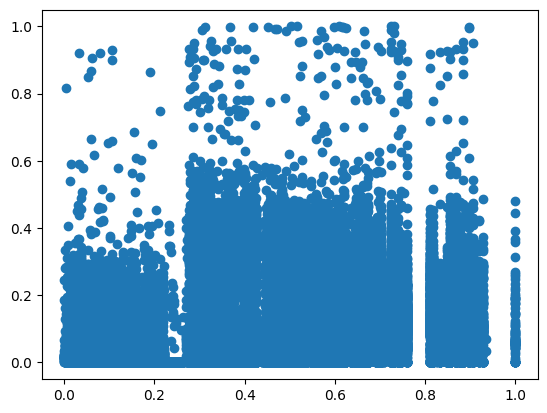

In [8]:
# Plot cluster graph to visualise results of clustering algorithm
plt.plot(star_x_train[km.labels_ == 0, 0], star_x_train[km.labels_ == 0, 1], 'o')
plt.plot(star_x_train[km.labels_ == 1, 0], star_x_train[km.labels_ == 1, 1], 'o')
plt.plot(star_x_train[km.labels_ == 2, 0], star_x_train[km.labels_ == 2, 1], 'o')

# There does seem to be some amount of division between the data points, although there is nothing quite noticeable about any sort of clustering taking place. If this is compared to a model with two clusters below, there does not seem to be much of an improvement in clustering, while the score decreases most likely due to a vast majority of the classes being of one type, so a single cluster hits that target much more.

C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4494


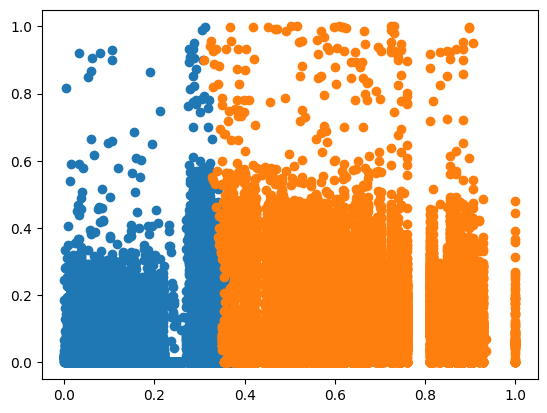

In [9]:
# Train test model to compare to with the hyper parameterised model above
km_test = KMeans(n_clusters=2)
km_test.fit(star_x_train)
score = np.sum(km_test.predict(star_x_test) == star_y_test) / star_y_test.size
print(score)

# Plot cluster graph to visualise results of clustering algorithm
plt.plot(star_x_train[km_test.labels_ == 0, 0], star_x_train[km_test.labels_ == 0, 1], 'o')
plt.plot(star_x_train[km_test.labels_ == 1, 0], star_x_train[km_test.labels_ == 1, 1], 'o')
plt.plot(star_x_train[km_test.labels_ == 2, 0], star_x_train[km_test.labels_ == 2, 1], 'o')
plt.show()

C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.349


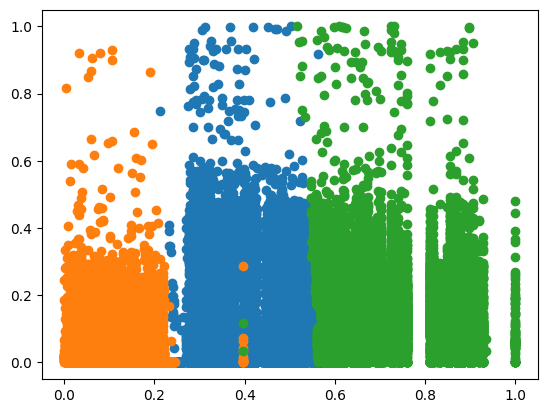

In [10]:
# Train test model to compare to with the hyper parameterised model above
km_test2 = KMeans(n_clusters=3)
km_test2.fit(star_x_train)
score = np.sum(km_test2.predict(star_x_test) == star_y_test) / star_y_test.size
print(score)

# Plot cluster graph to visualise results of clustering algorithm
plt.plot(star_x_train[km_test2.labels_ == 0, 0], star_x_train[km_test2.labels_ == 0, 1], 'o')
plt.plot(star_x_train[km_test2.labels_ == 1, 0], star_x_train[km_test2.labels_ == 1, 1], 'o')
plt.plot(star_x_train[km_test2.labels_ == 2, 0], star_x_train[km_test2.labels_ == 2, 1], 'o')
plt.show()

In [11]:
# Find best train, test split for this model and gwp dataset
gwp_x_train, gwp_x_test, gwp_y_train, gwp_y_test = SelectHoldoutSplits(star_data, KMeans(n_clusters=3, n_init=1), 'regression', True)

Test size: 0.2, Cross-validation score: 0.23745
MSE: 1.7324, RMSE: 1.3162066707018316
Test size: 0.25, Cross-validation score: 0.35612
MSE: 1.40024, RMSE: 1.1833173707843556
Test size: 0.3, Cross-validation score: 0.37500
MSE: 1.7223333333333333, RMSE: 1.3123769783615276


In [12]:
# Create clusters for regression data and add them to feature data
km2 = KMeans(n_clusters=3)
cl = km2.fit_predict(gwp_x_train)

features = np.column_stack((gwp_x_train, cl))

C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Train new regression model on this data set 
lr = LinearRegression()
lr.fit(features, gwp_y_train)
new_cl = km2.fit_predict(features)

C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
# Fit data after clustering to linear model and predict values
new_c_feat = np.column_stack((features, new_cl))

lr.fit(new_c_feat, gwp_y_train)
pred = lr.predict(new_c_feat)

In [15]:
# Measure score and error
score = r2_score(gwp_y_train, pred)
mae = mean_absolute_error(gwp_y_train, pred)
print(score, mae)

0.04446558733367423 0.7164250344537614


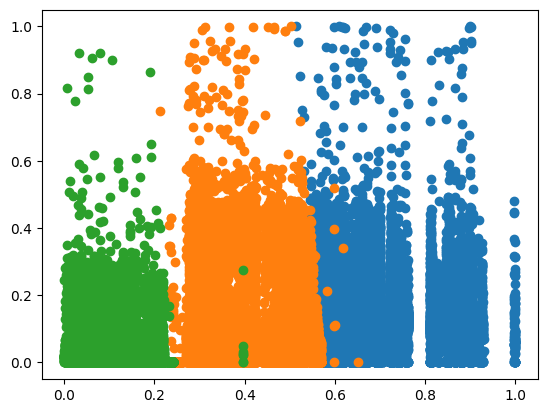

In [16]:
# Plot cluster graph to visualise results of clustering algorithm
plt.plot(gwp_x_train[km2.labels_ == 0, 2], gwp_x_train[km2.labels_ == 0, 1], 'o')
plt.plot(gwp_x_train[km2.labels_ == 1, 2], gwp_x_train[km2.labels_ == 1, 1], 'o')
plt.plot(gwp_x_train[km2.labels_ == 2, 2], gwp_x_train[km2.labels_ == 2, 1], 'o')

# A similar, shape can be seen here as for the classification data, however with much some overlap more consistent with the grouping. The feature data may be more suitable for patterns and therefore there is random samples in areas of the graph they should not be.

# The r2 score and error score show that the clustering method does not work well at all for regression dataset and regression problems.

# The classification algorithms performed much better than the clustering algorithm. This may be in part due to the feature data not being suitable for a clustering algorithm where values can not be clearly grouped together in relation to the target. Another reason for this might be due to the target class distribution, as an very large proportion of the samples belong to one class, this may not lend to lend to being able group up samples, on top of the features not having clear patterns which can be grouped.